<a href="https://colab.research.google.com/github/muxair080/chest_Xray_pnumonia_Detection/blob/main/chest_Xray_pnumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download Dataset from kaggle


In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:51<00:00, 19.9MB/s]
100% 2.29G/2.29G [01:51<00:00, 22.1MB/s]


# Unzip Dataset folder

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip')
zip_ref.extractall('/content')
zip_ref.close()

# Dependencies

In [106]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import cv2

In [107]:
DIRECTORY = r'/content/chest_xray/chest_xray'
FOLDERS = ['test','train', 'val']
CLASS = ['NORMAL','PNEUMONIA']


In [108]:
test_data = []
train_data = []
val_data  = []

for folder in FOLDERS:
  folder_path = os.path.join(DIRECTORY, folder)
  for classification in CLASS:
    image_path = os.path.join(folder_path, classification)
    for image in os.listdir(image_path):
      try:
        image_url = os.path.join(image_path, image)
        arr = cv2.imread(image_url)
        arr = cv2.resize(arr, (100, 100))
        label = CLASS.index(classification)
        if folder == 'train':
          train_data.append([arr, label])
        elif folder == 'test':
          test_data.append([arr, label])
        else:
          val_data.append([arr, label])
      
      except Exception as e:
        print(e)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [109]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

5216
624
16


In [110]:
import random
random.shuffle(train_data)

# Seperating Dependent and Independent features

In [111]:
X = []
y = []

for feature, label in train_data:
  X.append(feature)
  y.append(label)

In [112]:
X = np.array(X)
y = np.array(y)

In [113]:
X.shape

(5216, 100, 100, 3)

In [114]:
y.shape

(5216,)

In [115]:
X = X.reshape(-1,100,100,3)

# X = np.expand_dims(X, axis=1)

In [116]:
X.shape

(5216, 100, 100, 3)

# normalization

In [117]:
X = X/255

In [118]:
X.shape

(5216, 100, 100, 3)

In [119]:
X.shape[1:]

(100, 100, 3)

In [120]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential 


In [121]:
model = Sequential()

# Build CNN Mode

In [122]:
# layer1
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

# layer2
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# layer3
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# layer4
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

# Dense Layer

model.add(Dense(256,  activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='sigmoid'))


# Compile Model

In [123]:
model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [162]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, None, None, 100)   2800      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, None, None, 100)  0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, None, None, 100)   90100     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, None, None, 100)  0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, None, None, 100)   0         
                                                                 
 conv2d_37 (Conv2D)          (None, None, None, 100)  

In [124]:
r = model.fit(X, y, epochs=10, batch_size=30, validation_split=0.2)

Epoch 1/10
140/140 [==============================] - 5s 31ms/step - loss: 0.5128 - accuracy: 0.7713 - val_loss: 0.3355 - val_accuracy: 0.8381
Epoch 2/10
140/140 [==============================] - 4s 27ms/step - loss: 0.2515 - accuracy: 0.8938 - val_loss: 0.1776 - val_accuracy: 0.9397
Epoch 3/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1679 - accuracy: 0.9355 - val_loss: 0.1521 - val_accuracy: 0.9579
Epoch 4/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1459 - accuracy: 0.9477 - val_loss: 0.1202 - val_accuracy: 0.9636
Epoch 5/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1233 - accuracy: 0.9535 - val_loss: 0.1061 - val_accuracy: 0.9607
Epoch 6/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1145 - accuracy: 0.9578 - val_loss: 0.1104 - val_accuracy: 0.9626
Epoch 7/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1035 - accuracy: 0.9633 - val_loss: 0.0892 - val_accuracy: 0.9636

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

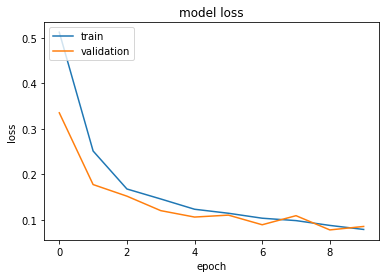

In [126]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Accuracy Graph

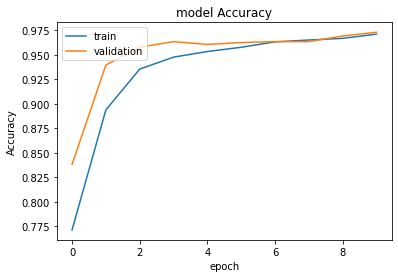

In [127]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [141]:
from tensorflow.keras.utils import load_img, img_to_array

In [180]:
# img = load_img('/content/chest_xray/chest_xray/test/NORMAL/IM-0007-0001.jpeg')
img = load_img('/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0301-0001.jpeg')

In [185]:
# img = load_img('/content/chest_xray/chest_xray/test/PNEUMONIA/person117_bacteria_553.jpeg')
img = load_img('/content/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg')

In [195]:
val_data_pneumonia = glob('/content/chest_xray/chest_xray/val/PNEUMONIA/*')

In [196]:
for img in val_data_pneumonia:
  CLASS = ['NORMAL', 'PNEUMONIA']
  img = load_img(img)
  # arr = cv2.imread(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr, (100,100))
  arr = arr.reshape(-1, 100,100,3)
  arr = arr/255

  prediction = model.predict([arr])
  print(prediction)
  print(CLASS[prediction.argmax()])


1/1 [==============================] - 0s 17ms/step
[[0.02346611 0.9631979 ]]
PNEUMONIA
1/1 [==============================] - 0s 15ms/step
[[0.04290246 0.9334392 ]]
PNEUMONIA
1/1 [==============================] - 0s 15ms/step
[[8.772563e-04 9.968995e-01]]
PNEUMONIA
1/1 [==============================] - 0s 14ms/step
[[0.03021405 0.95336324]]
PNEUMONIA
1/1 [==============================] - 0s 20ms/step
[[0.0059375 0.9864161]]
PNEUMONIA
1/1 [==============================] - 0s 15ms/step
[[0.00134147 0.9954098 ]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[5.105038e-04 9.979043e-01]]
PNEUMONIA
1/1 [==============================] - 0s 16ms/step
[[0.03424986 0.9451602 ]]
PNEUMONIA


In [197]:
val_data_normal = glob('/content/chest_xray/chest_xray/val/NORMAL/*')

In [198]:
for img in val_data_normal:
  CLASS = ['NORMAL', 'PNEUMONIA']
  img = load_img(img)
  # arr = cv2.imread(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr, (100,100))
  arr = arr.reshape(-1, 100,100,3)
  arr = arr/255

  prediction = model.predict([arr])
  print(prediction)
  print(CLASS[prediction.argmax()])


1/1 [==============================] - 0s 18ms/step
[[0.8246807  0.18965834]]
NORMAL
1/1 [==============================] - 0s 17ms/step
[[0.36868566 0.61543435]]
PNEUMONIA
1/1 [==============================] - 0s 15ms/step
[[0.7537678  0.26118445]]
NORMAL
1/1 [==============================] - 0s 14ms/step
[[0.9200634  0.10044025]]
NORMAL
1/1 [==============================] - 0s 16ms/step
[[0.4299309  0.52285135]]
PNEUMONIA
1/1 [==============================] - 0s 14ms/step
[[0.3448567 0.638862 ]]
PNEUMONIA
1/1 [==============================] - 0s 16ms/step
[[0.47704867 0.48477855]]
PNEUMONIA
1/1 [==============================] - 0s 15ms/step
[[0.8227096  0.19477043]]
NORMAL


In [186]:
CLASS = ['NORMAL', 'PNEUMONIA']

# arr = cv2.imread(img)
arr = img_to_array(img)
arr = cv2.resize(arr, (100,100))
arr = arr.reshape(-1, 100,100,3)
arr = arr/255

prediction = model.predict([arr])
print(prediction)
print(CLASS[prediction.argmax()])

1/1 [==============================] - 0s 17ms/step
[[0.03021405 0.95336324]]
PNEUMONIA
